In the first part of this project, rejection sampling was performed to draw samples from a Guassian mixture model (GMM). The mixture model that was used was the same one as the model from the 1-D case in the EM project. A regular normal RV was used for the proposal distribution. Equation 11.13 determined which samples were to be rejected. Using the remaining samples, a histogram was plotted. The histogram resembled the shape of the target distribution very closely.

In the second part of this project, the Monte Carlo Markov Chain (MCMC) method, Metropolis algorithm, was used to perform a linear regression. Equation 3.10 was used as the likelihood function, and the prior on the weights is represented by a normal distribution. Equation 11.33 was used to compute an estimate of the weight by accepting samples if A($z^{*}$, $z^{(\tau)})$ > u. Using the estimated values, a line of best fit is plotted, and it represents the data accurately.

Text(0.5, 1.0, 'Rejection Sampling on Gaussian Mixture Model')

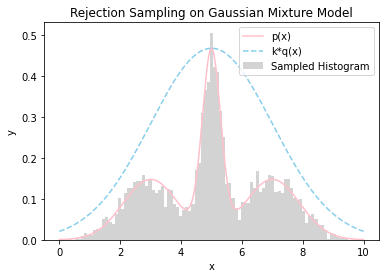

In [ ]:
#Project 6 | Sampling Methods
#Layth Yassin, Husam Almanakly, and Ali Ghuman

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib as mpl

#Initialize Means and Standard Deviations for Gaussian Mixture Model
mu = np.array([3, 5, 7])
sig = np.array([.9, 0.3, .9])
axis = np.linspace(0,10, 1000)

#Functions to generate proposal distribution (q(x)) and Gaussian Mixture Model 
Zp = 3
def p(axis): 
    return (norm.pdf(axis, mu[0], sig[0]) + norm.pdf(axis, mu[1], sig[1]) + norm.pdf(axis, mu[2], sig[2]))/Zp
def q(axis):  
    return norm.pdf(axis, loc=5, scale=2)

#Generate constant k such that k*q(x) >= p(x)
k = max(p(axis) / q(axis))
#use this function to determine how many samples to keep and what to reject
def rejection(N):
    samples = []

    #z = data
    for i in range(N):
        z = np.random.normal(5, 2)
        u = np.random.uniform(0, k*q(z)) #generate a u to compare with  
        
        if u <= p(z): #append the samples that aren't rejected
            samples.append(z)

    return np.array(samples) #return the samples that are kept 

#Equation 11.13
pp = p(axis)
#plot the actual distribution, the histograms and the proposal distribution 
plt.plot(axis, pp, color = 'pink', label = 'p(x)')
plt.plot(axis, k*q(axis), '--', color = 'skyblue', label = 'k*q(x)')
s = rejection(10000)

bins = np.linspace(0, 10, 100)
plt.hist(s, bins, density=True, color='lightgrey', label = "Sampled Histogram")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title('Rejection Sampling on Gaussian Mixture Model')

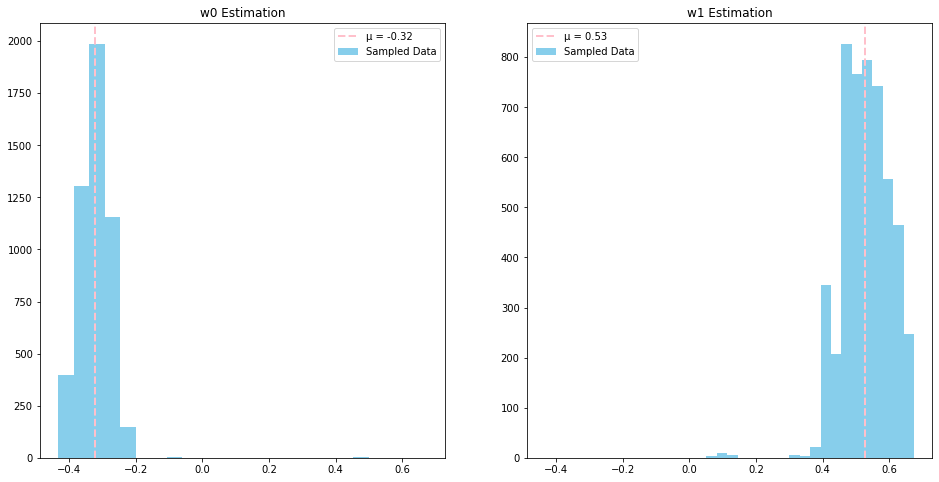

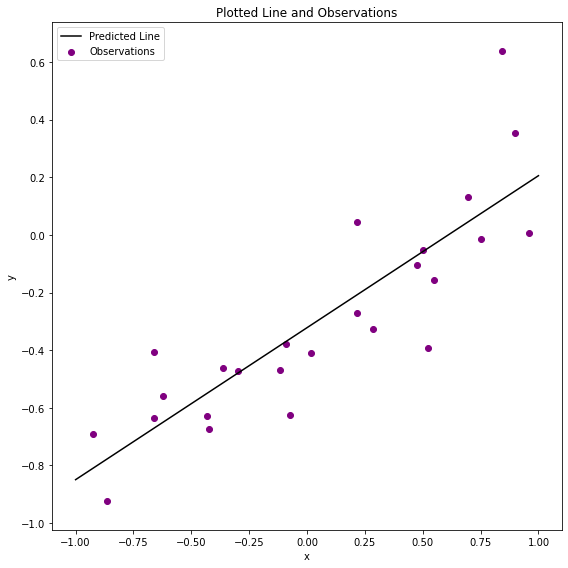

In [ ]:
###        Part 2           ###

a0 = -0.3
a1 = 0.5
alpha = 2.0
beta = 25
N = 25

#Generate Data 
noise = np.random.normal(0, np.sqrt(1/beta), N)
x = np.sort(np.random.uniform(-1,1,N))
y = a0 + a1*x + noise

sd = np.sqrt(1/beta) #get standard deviation

def prior(w): #obtain the prior given the weights at that step
    return np.log(norm(0.5, 0.5).pdf(w[0])) + np.log(norm(0.5, 0.5).pdf(w[1]))

def likelihood(w): #generate likelihood given weight at that step as well as given sd
    return np.sum(np.log(norm.pdf(y, w[0] + w[1]*x, sd)))

def posterior(w): #generate posterior from likelihood and prior
    return likelihood(w) + prior(w)

def proposal(w): #proposal distribution based off normal distribution 
    return [np.random.normal(w[0], 0.5), np.random.normal(w[1], 0.5)]

iterations = 5000 #how many times to run the algo
w_guess = [0.5, 0.5] #initial guess
results = np.zeros([iterations, 2]) #results array to hold samples 
results[0,0] = w_guess[0] #initialize the results array 
results[0, 1] = w_guess[1]

for current in range(1, iterations): #run the algo

    zTau = results[current-1, :]
    zStar = proposal(zTau)

    prob = np.exp(posterior(zStar) - posterior(zTau))

    if np.random.uniform(0,1) < prob: #keep sample 
        results[current, :] = zStar
    else: #copy the previous sample and rerun algo 
        results[current, :] = zTau


c = sum(results[:, 0])/len(results[:, 0]) #get means 
c2 = sum(results[:, 1])/len(results[:, 1])

figure, ax = plt.subplots(1, 2, sharex=True, figsize=[16,8]) #plot the distributions on the weights and histograms 

ax[0].hist(results[:,0], bins=20, color='skyblue', label = 'Sampled Data')
ax[0].axvline(c, color='pink', linestyle='dashed', linewidth=2, label = f'µ = {np.round(c,2)}')
ax[0].set_title('w0 Estimation')

ax[1].hist(results[:,1], bins=20, color='skyblue', label = 'Sampled Data')
ax[1].axvline(c2, color='pink', linestyle='dashed', linewidth=2, label = f'µ = {np.round(c2, 2)}')
ax[1].set_title('w1 Estimation')
ax[0].legend()
ax[1].legend()

#plot a scatterplot of the data points 
fig, ax = plt.subplots(figsize=[8,8])
ax.scatter(x, y, color = 'purple', label = 'Observations')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(np.min(y) - .1, np.max(y) + .1)

#plot the line given the estimated weights 
ax.set_title('Plotted Line and Observations')
ax.set_xlabel('x')
ax.set_ylabel('y')
x = np.linspace(-1,1,1000)
y2 = x*c2 + c
ax.plot(x, y2, color = 'black', label = 'Predicted Line')
plt.legend()
plt.tight_layout()
plt.show()